# Data Analysis and Visualization Examples

This notebook demonstrates common data analysis and visualization techniques using Python libraries including Pandas, Seaborn, and Matplotlib.

In [2]:
pip install pandas numpy seaborn matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and seed
sns.set(style="whitegrid")
np.random.seed(1)

## 1. Working with DataFrames

Let's start by creating a simple DataFrame with categorical data:

In [6]:
# Create sample DataFrame
data = {
    'ID': [101, 102, 103, 104, 105],
    'Category': ['Apple', 'Banana', 'Apple', 'Orange', 'Banana'],
    'Score': [88, 92, 85, 90, 87]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
    ID Category  Score
0  101    Apple     88
1  102   Banana     92
2  103    Apple     85
3  104   Orange     90
4  105   Banana     87


### Categorical Data Operations

In [7]:
# Convert to categorical
df['Category'] = df['Category'].astype('category')

# Show categories
print("Categories:", df['Category'].cat.categories)

# Show value counts
print("\nCategory Counts:")
print(df['Category'].value_counts())

Categories: Index(['Apple', 'Banana', 'Orange'], dtype='object')

Category Counts:
Category
Apple     2
Banana    2
Orange    1
Name: count, dtype: int64


## 2. Data Joining Example

Demonstrating a full outer join between two DataFrames:

In [8]:
# Create two sample DataFrames
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C'],
    'val1': [1, 2, 3]
})

df2 = pd.DataFrame({
    'key': ['B', 'C', 'D'],
    'val2': [4, 5, 6]
})

# Perform full outer join
result = pd.merge(df1, df2, on='key', how='outer')
print("Full Outer Join Result:")
print(result)

Full Outer Join Result:
  key  val1  val2
0   A   1.0   NaN
1   B   2.0   4.0
2   C   3.0   5.0
3   D   NaN   6.0


## 3. Visualization Examples

### Auto Data Visualizations

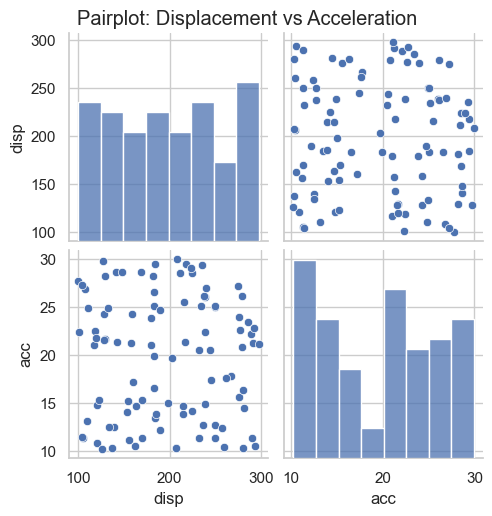

In [9]:
# Create sample auto data
auto = pd.DataFrame({
    'disp': np.random.uniform(100, 300, 100),
    'acc': np.random.uniform(10, 30, 100)
})

# Create pairplot
sns.pairplot(auto[['disp', 'acc']])
plt.suptitle("Pairplot: Displacement vs Acceleration", y=1.02)
plt.show()

### Box Plot Example

/var/folders/5y/zrngh81n7gqcbs16yh2d9fcw0000gn/T/ipykernel_44910/3741744705.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='yr', y='cyl', data=auto_box,


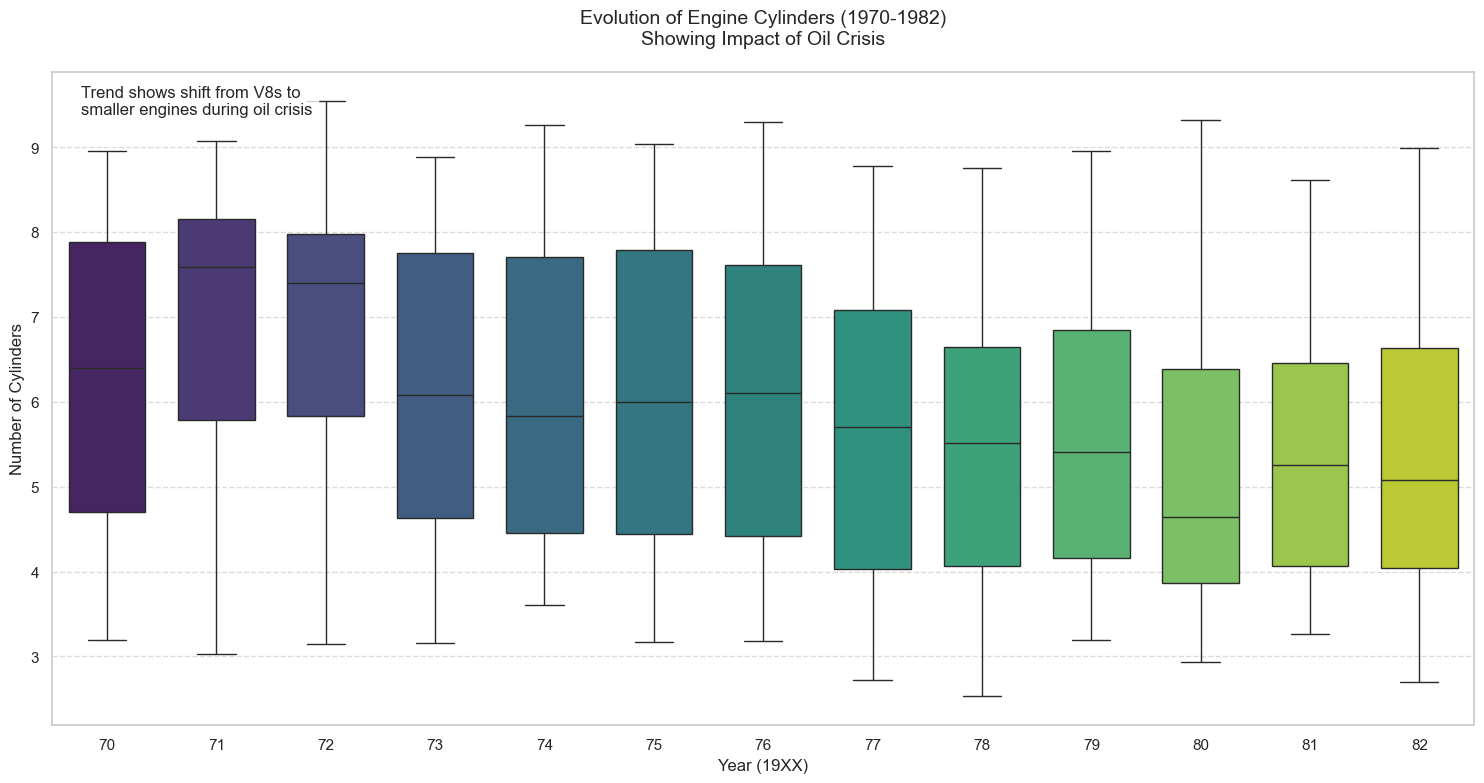


Summary Statistics by Year:
    count  mean   std   min   25%   50%   75%   max
yr                                                 
70  100.0  6.38  1.68  3.20  4.70  6.39  7.88  8.95
71  100.0  6.83  1.67  3.02  5.78  7.59  8.15  9.07
72  100.0  6.82  1.61  3.15  5.84  7.40  7.98  9.54
73  100.0  6.07  1.72  3.15  4.63  6.08  7.76  8.88
74  100.0  5.99  1.66  3.60  4.45  5.84  7.70  9.26
75  100.0  6.13  1.71  3.17  4.45  5.99  7.78  9.04
76  100.0  6.09  1.76  3.18  4.42  6.10  7.61  9.29
77  100.0  5.58  1.75  2.72  4.03  5.70  7.08  8.78
78  100.0  5.54  1.62  2.54  4.06  5.51  6.64  8.76
79  100.0  5.62  1.69  3.20  4.16  5.40  6.85  8.95
80  100.0  5.28  1.68  2.93  3.87  4.64  6.38  9.32
81  100.0  5.46  1.62  3.27  4.07  5.25  6.46  8.62
82  100.0  5.46  1.73  2.70  4.04  5.08  6.63  8.99


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create more realistic car data
np.random.seed(42)  # For reproducibility

# Generate years
years = list(range(70, 83))  # Years from 1970 to 1982
n_per_year = 100  # More samples per year

# Create data with realistic trends and variation
data = {
    'yr': [],
    'cyl': []
}

for year in years:
    # Number of samples for this year
    n_samples = n_per_year
    
    # Add years
    data['yr'].extend([year] * n_samples)
    
    # Create cylinder distribution that changes over time
    if year < 73:
        # Early 70s: More V8s
        cylinders = np.random.choice([4, 6, 8], n_samples, p=[0.2, 0.3, 0.5])
    elif year < 77:
        # Mid 70s: More balanced distribution
        cylinders = np.random.choice([4, 6, 8], n_samples, p=[0.3, 0.4, 0.3])
    else:
        # Late 70s and early 80s: More 4-cylinders due to fuel crisis
        cylinders = np.random.choice([4, 6, 8], n_samples, p=[0.5, 0.3, 0.2])
    
    # Add some random variation
    noise = np.random.normal(0, 0.5, n_samples)
    cylinders = cylinders + noise
    
    data['cyl'].extend(cylinders)

# Create DataFrame
auto_box = pd.DataFrame(data)

# Create an enhanced boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='yr', y='cyl', data=auto_box, 
            palette='viridis',  # Use a color gradient
            width=0.7,         # Box width
            fliersize=3)       # Outlier point size

# Customize the plot
plt.title('Evolution of Engine Cylinders (1970-1982)\nShowing Impact of Oil Crisis', 
          fontsize=14, pad=20)
plt.xlabel('Year (19XX)', fontsize=12)
plt.ylabel('Number of Cylinders', fontsize=12)

# Add a grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add some context as text
plt.text(0.02, 0.98, 'Trend shows shift from V8s to\nsmaller engines during oil crisis', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.show()

# Print some summary statistics
print("\nSummary Statistics by Year:")
print(auto_box.groupby('yr')['cyl'].describe().round(2))

### Strip Plot Example

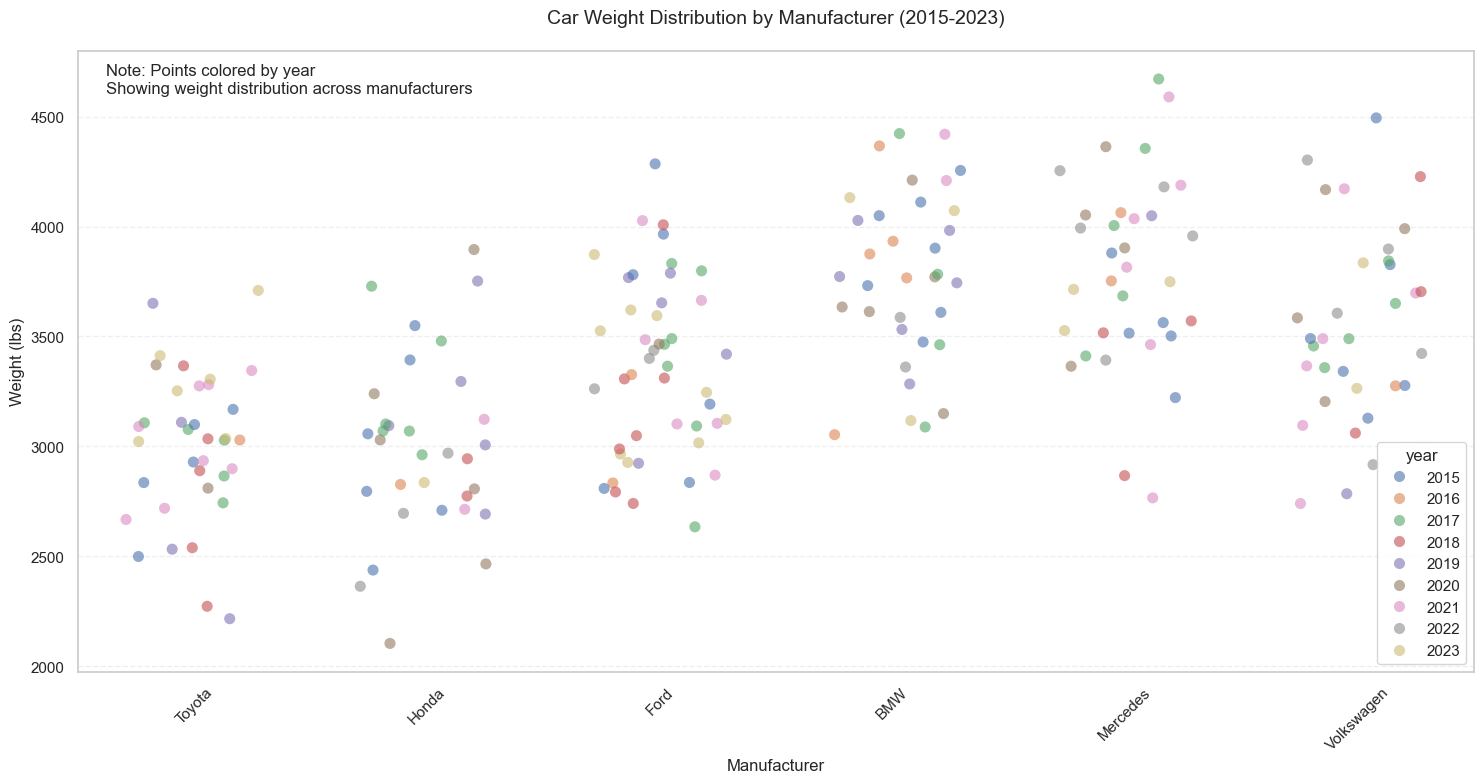


Summary Statistics by Manufacturer:
             weight                                        year
              count     mean     std      min      max     mean
manufacturer                                                   
BMW              34  3779.49  387.29  3052.82  4423.21  2018.29
Ford             46  3351.04  400.66  2633.48  4285.37  2019.15
Honda            32  2998.93  407.19  2102.87  3895.34  2018.44
Mercedes         34  3792.20  434.84  2765.23  4671.59  2019.12
Toyota           36  3002.94  341.36  2215.27  3709.38  2019.11
Volkswagen       33  3550.19  435.82  2739.51  4494.55  2018.97


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create realistic car manufacturer data
manufacturers = ['Toyota', 'Honda', 'Ford', 'BMW', 'Mercedes', 'Volkswagen']

# Create data with realistic patterns
data = {
    'manufacturer': [],
    'weight': [],
    'year': []
}

# Generate data for each manufacturer with realistic characteristics
for manufacturer in manufacturers:
    # Number of models varies by manufacturer
    n_models = np.random.randint(30, 50)
    
    # Base weight characteristics vary by manufacturer
    if manufacturer in ['BMW', 'Mercedes']:
        # Luxury cars: heavier
        base_weight = np.random.normal(3800, 400, n_models)
    elif manufacturer in ['Toyota', 'Honda']:
        # Economy cars: lighter
        base_weight = np.random.normal(3000, 300, n_models)
    else:
        # Mid-range
        base_weight = np.random.normal(3400, 350, n_models)
    
    # Add some random variation and ensure no negative weights
    weights = np.maximum(base_weight + np.random.normal(0, 200, n_models), 2000)
    
    # Generate years (2015-2023)
    years = np.random.randint(2015, 2024, n_models)
    
    # Append to data
    data['manufacturer'].extend([manufacturer] * n_models)
    data['weight'].extend(weights)
    data['year'].extend(years)

# Create DataFrame
df = pd.DataFrame(data)

# Create an enhanced stripplot
plt.figure(figsize=(15, 8))

# Create the main stripplot
sns.stripplot(data=df, 
             x='manufacturer', 
             y='weight',
             size=8,                     # Point size
             alpha=0.6,                  # Transparency
             jitter=0.3,                # Amount of jitter
             palette='deep',            # Color palette
             hue='year',               # Color points by year
             dodge=False)              # Don't dodge points by year

# Customize the plot
plt.title('Car Weight Distribution by Manufacturer (2015-2023)', 
          fontsize=14, pad=20)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Add explanatory text
plt.text(0.02, 0.98, 
         'Note: Points colored by year\nShowing weight distribution across manufacturers', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some summary statistics
print("\nSummary Statistics by Manufacturer:")
summary = df.groupby('manufacturer').agg({
    'weight': ['count', 'mean', 'std', 'min', 'max'],
    'year': 'mean'
}).round(2)
print(summary)

### Histogram Example

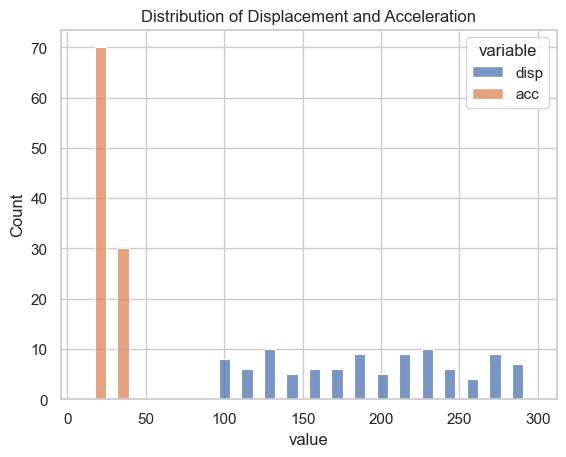

In [17]:
# Create histogram
auto_melt = auto[['disp', 'acc']].melt(var_name='variable', value_name='value')

plt.figure()
sns.histplot(data=auto_melt, x='value', hue='variable', multiple='dodge', bins=20)
plt.title("Distribution of Displacement and Acceleration")
plt.show()

# Advanced Histogram Example



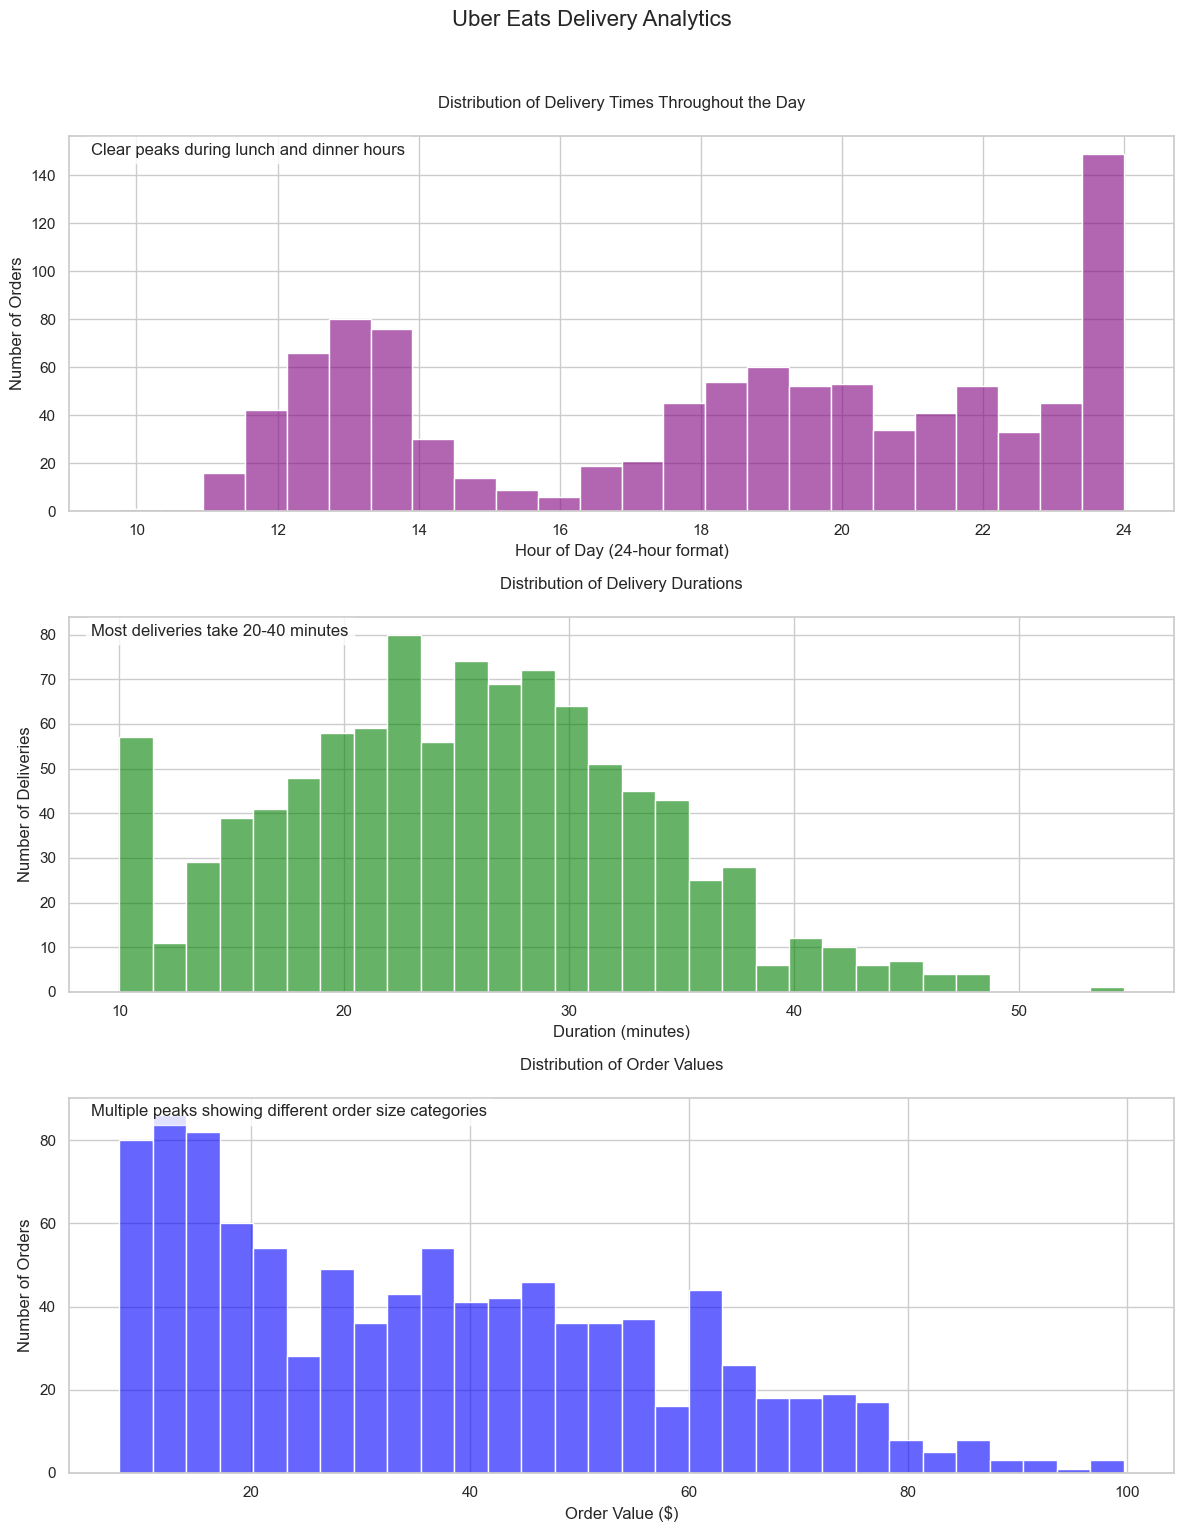


Summary Statistics:

Delivery Times (Hour of Day):
count    999.00
mean      18.23
std        4.20
min        9.76
25%       13.64
50%       18.87
75%       21.93
max       24.00
Name: delivery_time, dtype: float64

Delivery Durations (Minutes):
count    999.00
mean      25.28
std        8.10
min       10.00
25%       19.61
50%       25.32
75%       30.66
max       54.66
Name: duration, dtype: float64

Order Values ($):
count    999.00
mean      36.53
std       21.15
min        8.00
25%       17.22
50%       34.17
75%       51.54
max       99.68
Name: order_value, dtype: float64

Interesting Metrics:
Percentage of deliveries during lunch hours (11-14): 28.6%
Percentage of deliveries during dinner hours (18-21): 25.4%
Percentage of orders over $50: 27.0%


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate realistic delivery data
n_deliveries = 999  # Make it divisible by 3

# Create time periods (lunch, dinner, late night)
lunch_times = np.random.normal(13, 1, n_deliveries // 3)  # Around 1 PM
dinner_times = np.random.normal(19, 1.5, n_deliveries // 3)  # Around 7 PM
late_night = np.random.normal(23, 2, n_deliveries // 3)  # Around 11 PM

# Combine all times and ensure they're within 0-24 range
delivery_times = np.concatenate([lunch_times, dinner_times, late_night])
delivery_times = np.clip(delivery_times, 0, 24)

# Generate delivery durations (in minutes)
base_duration = np.random.normal(25, 8, n_deliveries)  # Base delivery time
traffic_factor = 5 * np.sin(delivery_times * np.pi/12)  # Traffic effect varies by time of day
weather_factor = np.random.exponential(2, n_deliveries)  # Random weather delays
total_duration = np.clip(base_duration + traffic_factor + weather_factor, 10, 90)

# Generate order values (adjust sizes to match n_deliveries)
order_values = np.concatenate([
    np.random.normal(15, 5, n_deliveries // 3),    # Regular orders
    np.random.normal(35, 10, n_deliveries // 3),   # Medium orders
    np.random.normal(60, 15, n_deliveries // 3)    # Large orders
])
order_values = np.clip(order_values, 8, 100)  # Minimum $8, Maximum $100

# Create DataFrame
uber_eats_data = pd.DataFrame({
    'delivery_time': delivery_times,
    'duration': total_duration,
    'order_value': order_values
})

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# 1. Delivery Times Histogram
sns.histplot(data=uber_eats_data, x='delivery_time', bins=24, 
            ax=ax1, color='purple', alpha=0.6)
ax1.set_title('Distribution of Delivery Times Throughout the Day', pad=20)
ax1.set_xlabel('Hour of Day (24-hour format)')
ax1.set_ylabel('Number of Orders')
ax1.text(0.02, 0.95, 'Clear peaks during lunch and dinner hours', 
         transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))

# 2. Delivery Duration Histogram
sns.histplot(data=uber_eats_data, x='duration', bins=30,
            ax=ax2, color='green', alpha=0.6)
ax2.set_title('Distribution of Delivery Durations', pad=20)
ax2.set_xlabel('Duration (minutes)')
ax2.set_ylabel('Number of Deliveries')
ax2.text(0.02, 0.95, 'Most deliveries take 20-40 minutes', 
         transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.8))

# 3. Order Value Histogram
sns.histplot(data=uber_eats_data, x='order_value', bins=30,
            ax=ax3, color='blue', alpha=0.6)
ax3.set_title('Distribution of Order Values', pad=20)
ax3.set_xlabel('Order Value ($)')
ax3.set_ylabel('Number of Orders')
ax3.text(0.02, 0.95, 'Multiple peaks showing different order size categories', 
         transform=ax3.transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Add an overall title
plt.suptitle('Uber Eats Delivery Analytics', fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nDelivery Times (Hour of Day):")
print(uber_eats_data['delivery_time'].describe().round(2))
print("\nDelivery Durations (Minutes):")
print(uber_eats_data['duration'].describe().round(2))
print("\nOrder Values ($):")
print(uber_eats_data['order_value'].describe().round(2))

# Calculate some interesting metrics
print("\nInteresting Metrics:")
print(f"Percentage of deliveries during lunch hours (11-14): "
      f"{(uber_eats_data['delivery_time'].between(11,14)).mean()*100:.1f}%")
print(f"Percentage of deliveries during dinner hours (18-21): "
      f"{(uber_eats_data['delivery_time'].between(18,21)).mean()*100:.1f}%")
print(f"Percentage of orders over $50: "
      f"{(uber_eats_data['order_value'] > 50).mean()*100:.1f}%")

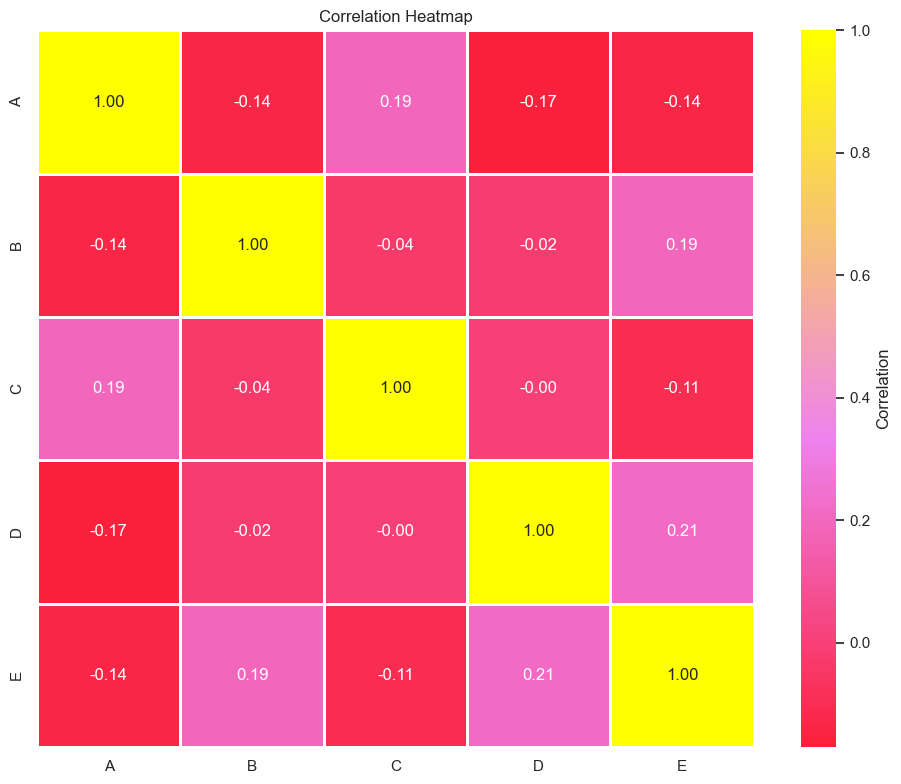

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create a sample dataset with 100 observations and 5 variables
data = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.randn(100),
    'C': np.random.randn(100),
    'D': np.random.randn(100),
    'E': np.random.randn(100)
})

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a custom colormap from black to yellow through red and violet
colors = ['black', 'red', 'violet', 'yellow']
custom_cmap = sns.blend_palette(colors, as_cmap=True, n_colors=100)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            cmap=custom_cmap,
            annot=True,              # Show numbers in cells
            fmt='.2f',              # Format numbers to 2 decimal places
            center=0,               # Center the colormap at 0
            square=True,           # Make the plot square-shaped
            linewidths=1,          # Add lines between cells
            cbar_kws={'label': 'Correlation'})

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# imaginary heatmaps from Zurich Tram Stations

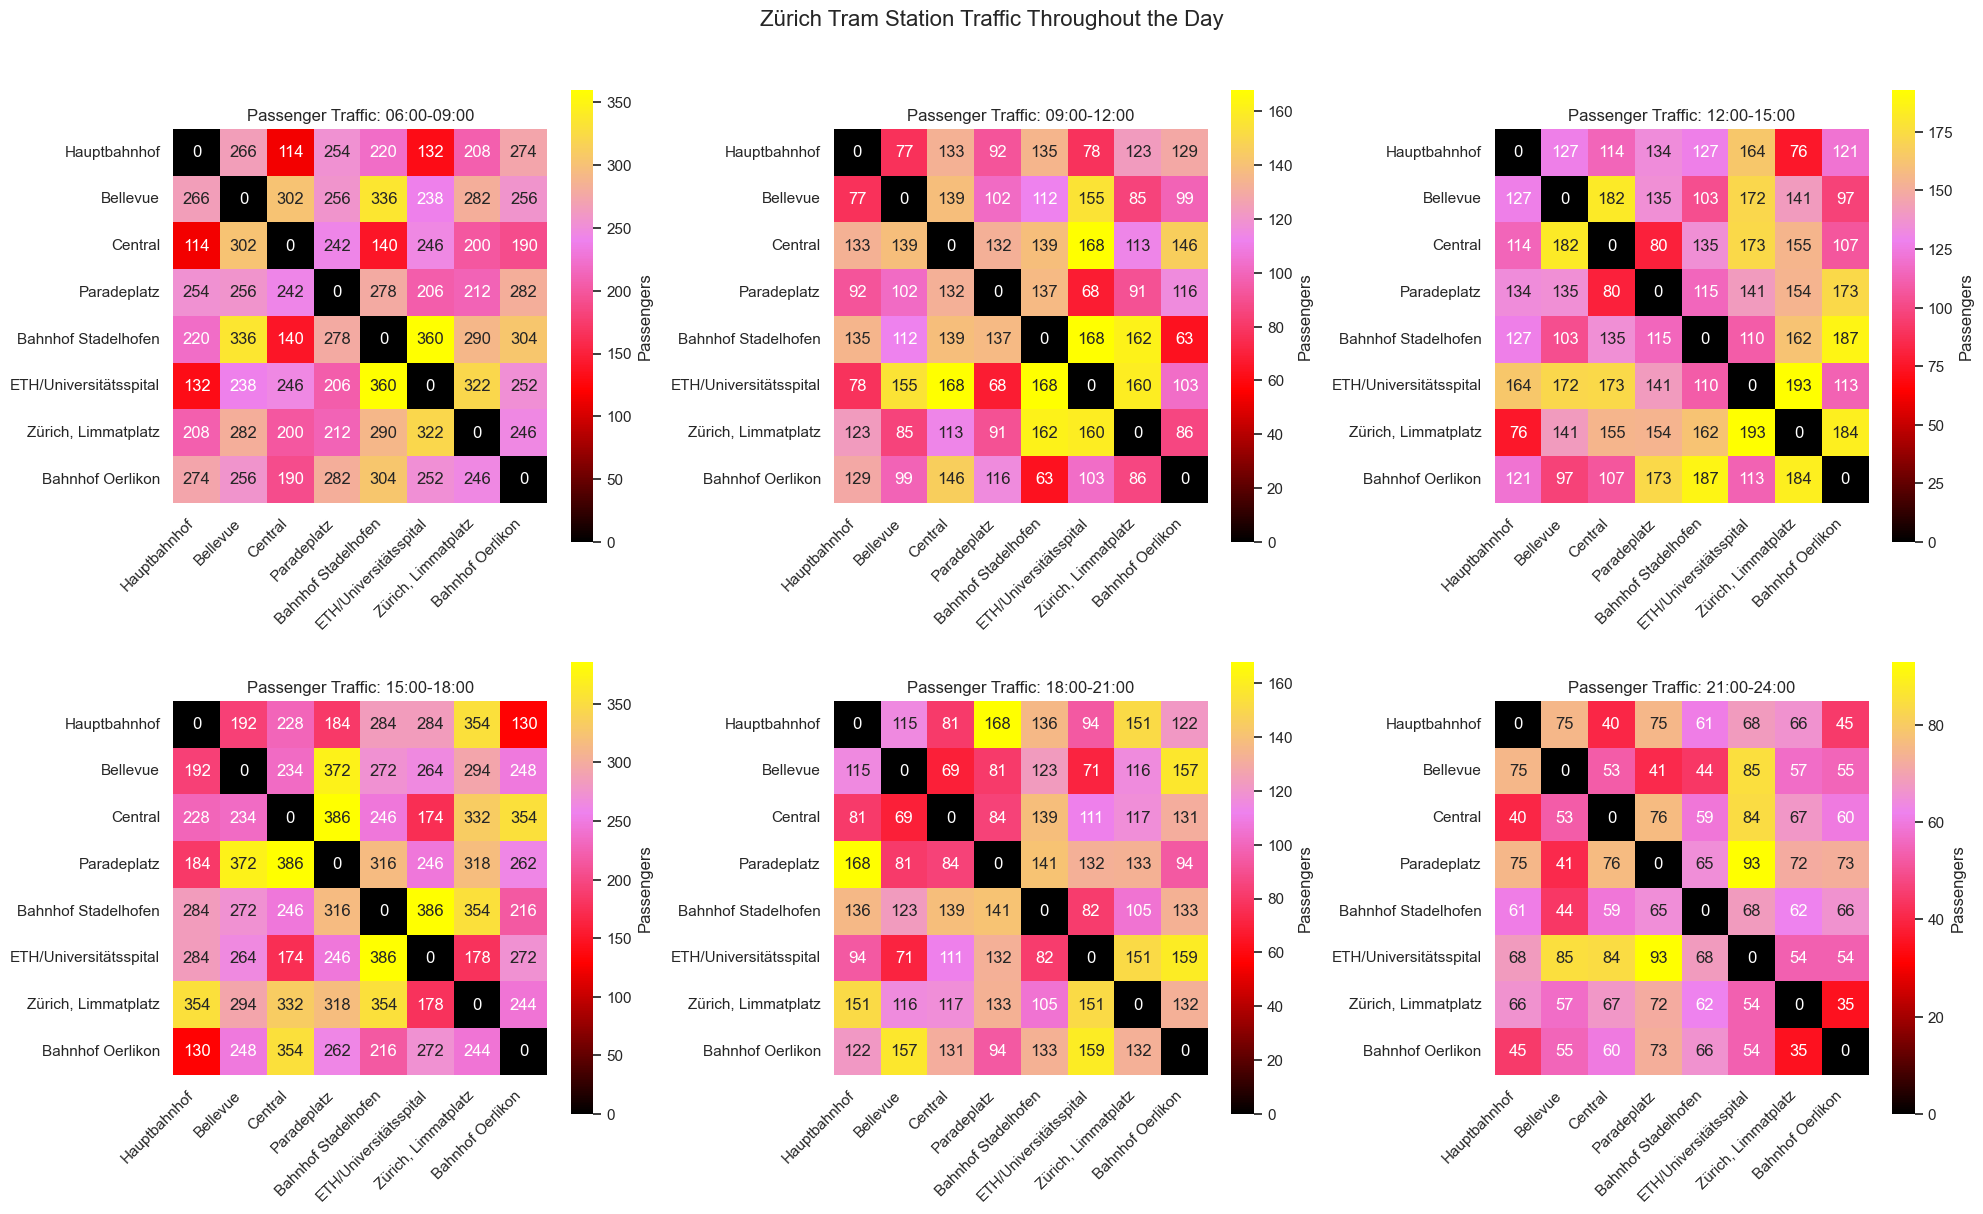

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define major tram stations in Zürich
stations = [
    'Hauptbahnhof', 
    'Bellevue', 
    'Central', 
    'Paradeplatz', 
    'Bahnhof Stadelhofen',
    'ETH/Universitätsspital',
    'Zürich, Limmatplatz',
    'Bahnhof Oerlikon'
]

# Create time periods
time_periods = [
    '06:00-09:00',
    '09:00-12:00',
    '12:00-15:00',
    '15:00-18:00',
    '18:00-21:00',
    '21:00-24:00'
]

# Create synthetic passenger data
# Higher values during rush hours (morning and evening)
# Lower values during off-peak hours
def generate_traffic_data(time_period):
    base = np.random.randint(50, 200, size=(len(stations), len(stations)))
    
    # Make matrix symmetric (assuming similar traffic both ways)
    base = (base + base.T) // 2
    
    # Adjust for rush hours
    if time_period in ['06:00-09:00', '15:00-18:00']:
        base = base * 2  # Double traffic during rush hours
    elif time_period in ['21:00-24:00']:
        base = base // 2  # Half traffic during late hours
    
    # Set diagonal to 0 (no traffic from station to itself)
    np.fill_diagonal(base, 0)
    return base

# Create a dictionary to store data for each time period
traffic_data = {period: generate_traffic_data(period) for period in time_periods}

# Plot heatmaps for each time period
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Custom colormap from black through red and violet to yellow
colors = ['black', 'red', 'violet', 'yellow']
custom_cmap = sns.blend_palette(colors, as_cmap=True, n_colors=100)

# Create heatmaps
for idx, (period, data) in enumerate(traffic_data.items()):
    sns.heatmap(
        data,
        ax=axes[idx],
        xticklabels=stations,
        yticklabels=stations,
        cmap=custom_cmap,
        annot=True,
        fmt='d',
        cbar_kws={'label': 'Passengers'},
        square=True
    )
    axes[idx].set_title(f'Passenger Traffic: {period}')
    # Rotate x-axis labels for better readability
    axes[idx].set_xticklabels(stations, rotation=45, ha='right')
    axes[idx].set_yticklabels(stations, rotation=0)

plt.suptitle('Zürich Tram Station Traffic Throughout the Day', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()